# 2. Структура временного ряда (ch10-15)

# A Gentle Introduction to White Noise

Белый шум - важное понятие в прогнозировании временных рядов. Если временной ряд является белым шумом, то он
представляет собой последовательность случайных чисел и не может быть спрогнозирован. Если ряд ошибок прогноза не является
белым шумом, то это говорит о том, что в прогнозную модель можно внести улучшения. 

Временной ряд может быть белым шумом. Временной ряд является белым шумом, если переменные независимы и одинаково распределены со средним нулевым значением. Это означает, что все переменные имеют одинаковую дисперсию (сигма^2), и каждое значение имеет нулевую корреляцию со всеми другими значениями временного ряда. Если переменные в ряду взяты из гауссовского распределения, ряд называется гауссовским белым шумом. 

Диагностика моделей - важная область прогнозирования временных рядов. Ожидается, что временной ряд содержит компонент белого шума поверх сигнала, генерируемого некоторым процессом: y(t) = signal(t) + noise(t). Поэтому в идеале ряд ошибок прогноза на основе подобранной модели должен представлять собой белый шум. 

Временной ряд не является белым шумом, если выполняется одно из следующих условий:
* Временной ряд имеет среднее значение, отличное от нуля?
* Меняется ли дисперсия со временем?
* Значения ряда коррелируют с лаговыми значениями?

Вот некоторые инструменты, которые вы можете использовать, чтобы проверить, является ли ваш временной ряд белым шумом:
* Постройте линейный график. Проверьте наличие общих характеристик, таких как изменяющееся среднее значение, дисперсия или взаимосвязь между лаговыми переменными.
* Вычислить сводную статистику. Сравните среднее значение и дисперсию всего ряда со средним значением и дисперсией значимых смежных блоков (например, дней, месяцев или лет).
* Постройте график автокорреляции. Проверьте наличие корреляции между лаговыми переменными. 

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


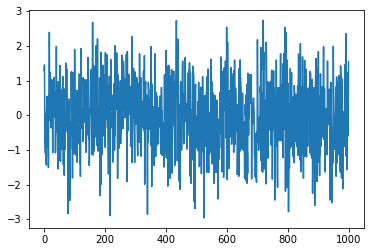

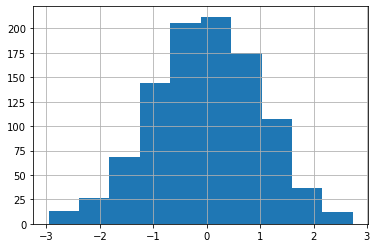

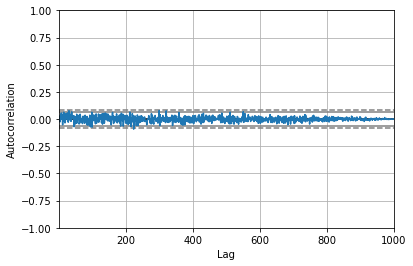

In [1]:
# calculate and plot a white noise series
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
# summary stats
print(series.describe())
# line plot
series.plot()
pyplot.show()
# histogram plot
series.hist()
pyplot.show()
# autocorrelation
autocorrelation_plot(series)
pyplot.show()

Мы видим, что среднее близко к нулю, а стандартное отклонение - около 1,0. Ряд похож на гауссовский белый шум. Коррелограмма не показывает значимой автокорреляции.

# A Gentle Introduction to the Random Walk

Существует инструмент, называемый случайным блужданием, который может помочь понять, возможно ли сделать прогноз по временному ряду.

Создадим ряд случайных чисел.

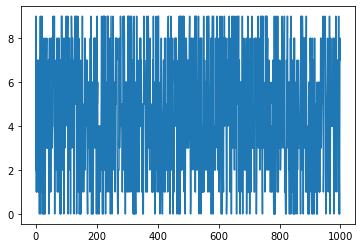

In [1]:
# create and plot a random series
from random import seed
from random import randrange
from matplotlib import pyplot
seed(1)
series = [randrange(10) for i in range(1000)]
pyplot.plot(series)
pyplot.show()

Случайное блуждание отличается от набора случайных чисел тем, что следующее значение является модификацией предыдущего значения в последовательности. Процесс, использованный для создания ряда, создает зависимость между шагами. Эта зависимость обеспечивает некоторую согласованность, в отличие от больших скачков, которые характерны для ряда независимых случайных чисел. Именно эта зависимость дает процессу название случайного блуждания. Простая модель случайного блуждания выглядит следующим образом:
1. Начните со случайного числа -1 или 1.
2. Произвольно выберите -1 или 1 и добавьте его к наблюдению из предыдущего временного шага. 
3. Повторяйте шаг 2 столько, сколько хотите.

Более кратко мы можем описать этот процесс следующим образом: y(t) = B0 + B1 * X(t - 1) + e(t) 

Здесь y (t) - следующее значение временного ряда. B0 - это коэффициент, который, если ему присвоено значение, отличное от нуля, добавляет к случайному блужданию постоянное отклонение. B1 - коэффициент для взвешивания предыдущего
значения ряда, установлен на уровне 1.0. X(t-1) - это наблюдение на предыдущем временном шаге. e (t) - это белый шум, или случайные колебания в то времени.

Создадим случайное блуждание.

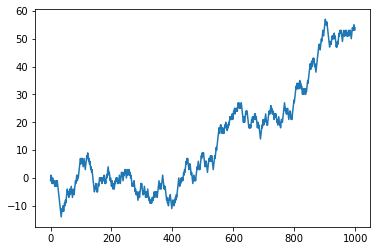

In [2]:
# create and plot a random walk
from random import seed
from random import random
from matplotlib import pyplot
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

Учитывая способ построения случайного блуждания, мы ожидаем сильную автокорреляцию с предыдущим наблюдением и линейную зависимость между ними. 

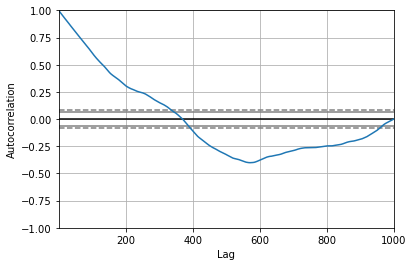

In [3]:
# plot the autocorrelation of a random walk
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(random_walk)
pyplot.show()

Стационарный временной ряд - это тот, в котором значения не зависят от времени. Учитывая способ построения случайного блуждания и
результаты проверки автокорреляции, мы знаем, что наблюдения в случайном блуждании зависят от времени. Текущее наблюдение является случайным шагом по сравнению с предыдущим наблюдением.

Следовательно, можно ожидать, что случайное блуждание будет нестационарным. На самом деле, все случайные блуждания
являются нестационарными. Обратите внимание, что не все нестационарные временные ряды являются случайными блужданиями.
Кроме того, нестационарный временной ряд не имеет постоянного среднего значения и / или дисперсии во времени. Обзор графика случайного блуждания позволяет предположить, что это так. Мы можем это подтвердить с использованием расширенного теста Дики-Фуллера. 

In [4]:
# calculate the stationarity of a random walk
from statsmodels.tsa.stattools import adfuller
# statistical test
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Нулевая гипотеза теста заключается в том, что временной ряд нестационарен. Запустив пример, мы видим, что значение тестовой статистики равно 0,341605. Это больше всех критических значений на уровне значимости 1%, 5% и 10%. Следовательно, можно сказать, что временной ряд является нестационарными с низкой вероятностью того, что результат будет являться статистической погрешностью.

Мы можем сделать случайное блуждание стационарным, взяв первую разность. Это заменяет каждое наблюдение на разность между ним и предыдущим значением. Учитывая то, как было построено случайное блуждание, мы ожидаем, что это приведет к временному ряду значений от -1 до 1. Именно это мы и видим. 

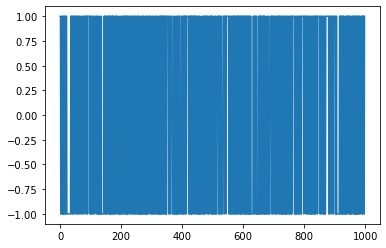

In [5]:
# calculate and plot a differenced random walk
# take difference
diff = list()
for i in range(1, len(random_walk)):
	value = random_walk[i] - random_walk[i - 1]
	diff.append(value)
# line plot
pyplot.plot(diff)
pyplot.show()

Этот график разностей показывает, что на самом деле у нас нет информации, с которой можно было бы работать. Здесь, кроме набора случайных данных, нет структуры для изучения. 

После того, как ряд стал стационарным, мы можем заново по нему построить коррелограмму. 

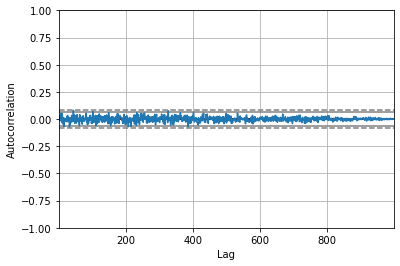

In [6]:
# plot the autocorrelation of a differenced random walk
from pandas.plotting import autocorrelation_plot
# line plot
autocorrelation_plot(diff)
pyplot.show()

Запустив пример, мы не видим существенной связи между лаговыми наблюдениями, как и следовало ожидать, учитывая способ генерации случайного блуждания. Все корреляции маленькие, близкие к нулю с уверенностью в 95% и 99%.

Случайное блуждание непредсказуемо, его нельзя разумно предсказать. Учитывая это, мы можем ожидать, что лучший прогноз, который мы могли бы сделать, это использовать наблюдение на предыдущем временном шаге как то, что произойдет на следующем временном шаге. Просто
потому что мы знаем, что следующий временной шаг будет функцией предыдущего временного шага. Это часто называется наивным прогнозом, или моделью настойчивости.

In [7]:
# persistence forecasts for a random walk
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# persistence
predictions = list()
history = train[-1]
for i in range(len(test)):
	yhat = history
	predictions.append(yhat)
	history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


Временной ряд может быть случайным блужданием. Некоторые способы проверить, является ли ваш временной ряд случайным блужданием:
* Временной ряд показывает сильную временную зависимость, которая убывает линейно или подобным образом.
* Временной ряд нестационарен, и после приведения его к стационарному виду, он не показывает очевидной структуры.
* Модель настойчивости обеспечивает лучший прогноз. 

# Decompose Time Series Data

Декомпозиция временных рядов предполагает рассмотрение ряда как комбинации уровня, тренда, сезонности, и шумовой составляющей. Декомпозиция предоставляет полезную абстрактную модель для размышлений о временном ряде в целом и для лучшего понимания проблем во время анализа и прогнозирования временных рядов. 

Считается, что временной ряд состоит из трех систематических компонентов, включая уровень, тренд, сезонность и одного несистематического компонента, называемого шумом. Эти компоненты определяется следующим образом:
* Уровень - среднее значение временного ряда.
* Тренд - возрастающее или убывающее значение ряда.
* Сезонность - повторяющийся краткосрочный цикл в ряде.
* Шум - случайное изменение в ряде. 

Компоненты можно собрать в единое целое аддитивно или мультипликативно.

Аддитивная модель предполагает, что компоненты ряда складываются следующим образом: y(t) = Level + Trend + Seasonality + Noise

Аддитивная модель является линейной, в которой изменения во времени постоянны. Линейный тренд - это прямая линия. Линейная сезонность имеет одинаковую частоту (длина циклов) и амплитуду (высота циклов). 

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


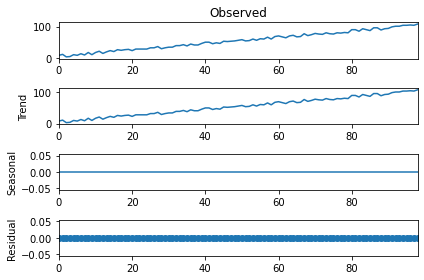

In [1]:
# additive decompose a contrived additive time series
from random import randrange
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

Мультипликативная модель предполагает, что компоненты перемножаются следующим образом: y(t) = Level * Trend * Seasonality * Noise

Мультипликативная модель является нелинейной, например, квадратичной или экспоненциальной. Изменения увеличиваются или
уменьшаются со временем. Нелинейный тренд - это кривая линия. Нелинейная сезонность имеет возрастающую или убывающую частоту и / или амплитуду с течением времени. 

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


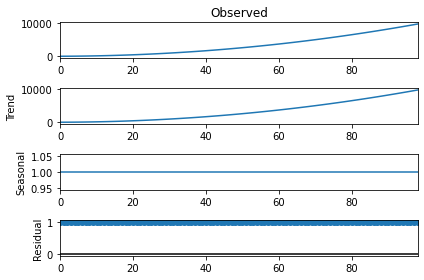

In [2]:
# multiplicative decompose a contrived multiplicative time series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
pyplot.show()

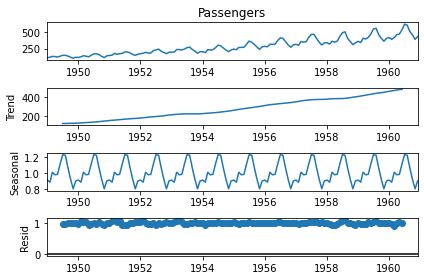

In [3]:
# multiplicative decompose time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

# Use and Remove Trends

Набор данных временных рядов может содержать тренд (тенденцию). Тенденция - это постоянное увеличение или уменьшение значений временного ряда с течением времени. Выявление, моделирование и даже удаление тренда может принести пользу при моделировании и прогнозировании временных рядов. 

Возможно, самый простой способ избавиться от тренда во временном ряду - это провести дифференцирование. В частности, строится новый ряд, в котором значение на текущем временном шаге рассчитывается как разность между исходным наблюдением и наблюдением на предыдущем временном шаге: value(t) = observation(t) - observation(t - 1)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


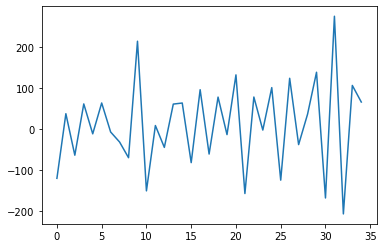

In [1]:
# detrend a time series using differencing
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
X = series.values
diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

Тренд часто легко визуализировать в виде линии, проведенной через наблюдения. Линейные тренды могут быть описаны с помощью линейной модели, а нелинейные тренды лучше всего описывать с помощью полинома или другого метода придания изгибов ряду данных. 

Прогнозы на основе модели линейного (или нелинейного) тренда можно вычесть из исходного временного ряда, чтобы
получить набор данных без тренда: value(t) = observation(t) - prediction(t)

Остатки модели представляют собой набор данных с исключенным трендом. Также могут быть использованы полиномиальная кривая и другие нелинейные модели. 

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


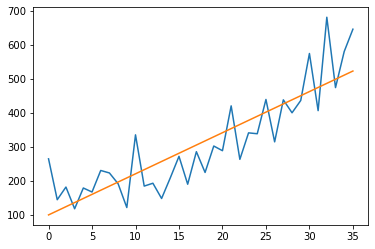

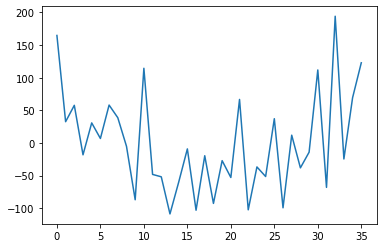

In [2]:
# use a linear model to detrend a time series
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()

# Use and Remove Seasonality

Наборы данных временных рядов могут содержать сезонную составляющую. Это периодические колебания, которые повторяются со временем,
например, ежемесячно или ежегодно. Эти повторяющиеся колебания могут скрыть сигнал, который мы хотим смоделировать при прогнозировании и, в свою очередь, могут дать сильный сигнал нашим прогнозным моделям. 

Простой способ внести поправку на сезонную составляющую - использовать дифференцирование. Если есть сезонный компонент на уровне одной недели, то мы можем удалить его, вычтя из текущего наблюдения соответствующее наблюдение на прошлой неделе.

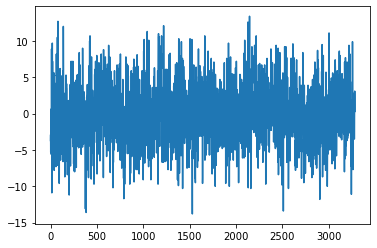

In [1]:
# deseasonalize a time series using differencing
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	value = X[i] - X[i - days_in_year]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

Другой вариант - учесть, что температура в любой период года, вероятно, стабильная. Поэтому можно вычесть из текущего наблюдения среднее значение, характерное для данного периода, а не соответствующее значение прошлого периода.

Выведем среднемесячные температуры за 1981 год.

Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
1981-06-30     7.306667
1981-07-31     7.577419
1981-08-31     7.238710
1981-09-30    10.143333
1981-10-31    10.087097
1981-11-30    11.890000
1981-12-31    13.680645
1982-01-31    16.567742
Freq: M, Name: Temp, dtype: float64


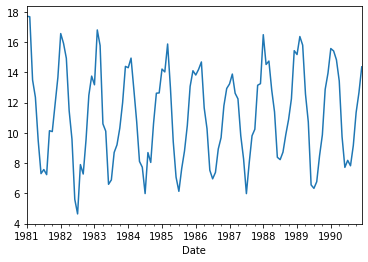

In [2]:
# calculate and plot monthly average
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
pyplot.show()

Вычтем из данных соотвествующие среднемесячные значения температур и убедимся, что нам удалось избавиться от сезонности.

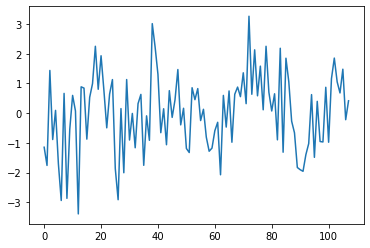

In [3]:
# deseasonalize monthly data by differencing
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
resample = series.resample('M')
monthly_mean = resample.mean()
X = series.values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
	value = monthly_mean[i] - monthly_mean[i - months_in_year]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

Далее мы можем использовать среднемесячные минимальные температуры за тот же месяц применительно к предыдущему году, чтобы скорректировать весь набор данных.

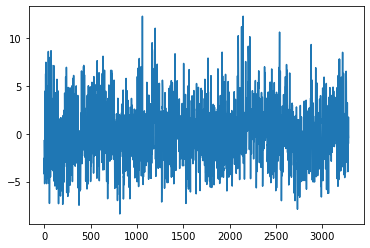

In [4]:
# deseasonalize a time series using month-based differencing
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	month_str = str(series.index[i].year-1)+'-'+str(series.index[i].month)
	month_mean_last_year = series[month_str].mean()
	value = X[i] - month_mean_last_year
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

Мы можем смоделировать сезонную составляющую напрямую, а затем вычесть ее из наблюдений. Сезонная составляющая временного ряда, вероятно, представляет собой синусоидальную волну за фиксированный период и с заданной амплитудой. Это можно легко аппроксимировать с помощью метода построения кривых. 

Смоделируем сезонность на основе полинома 4 степени.

Coefficients: [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


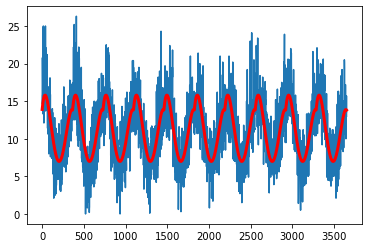

In [5]:
# model seasonality with a polynomial model
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

Избавимся от сезонности, смоделированной с помощью полинома 4 степени.

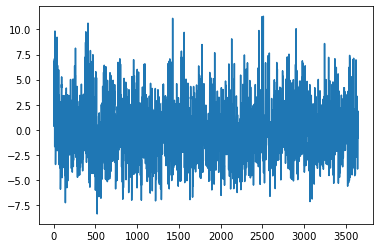

In [6]:
# deseasonalize by differencing with a polynomial model
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
	value = values[i] - curve[i]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

# Stationarity in Time Series Data

При моделировании есть предположение, что сводная статистика должна быть постоянной. Для этого временной ряд должен быть стационарным. Эти предположения могут быть легко нарушены во временных рядах добавлением тренда, сезонности и других структур, зависящих от времени. 

Наблюдения в стационарном ряде не зависят от времени. Временной ряд стационарный, если в нем нет тренда или сезонной составляющей. В стационарном ряде средняя и дисперсия постоянны во времени, поэтому такой ряд легко моделировать. Для моделирования ряда с помощью статистических методов необходимо, чтобы этот ряд был стационарным.

Посмотрим на ряд рождений девочек.

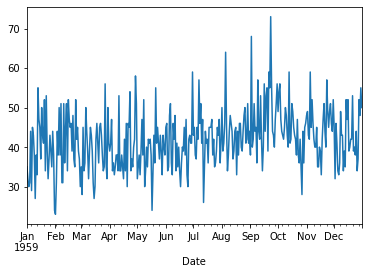

In [1]:
# load time series data
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

На рисунке представлен стационарный временной ряд.

Посмотрим на ряд пассажиропотока.

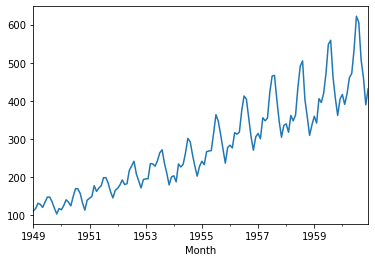

In [2]:
# load time series data
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

На рисунке представлен нестационарный временной ряд, т.к. он содержит как тренд, так и сезонную составляющую.

Быстрая и грубая проверка того, является ли ваш временной ряд нестационарным, - это посмотреть описательные статистики. Вы можете разделить свой временной ряд на две (или более) частей и сравнить их средние значения и дисперсии. Если они различаются и разница статистически значима, временной ряд, скорее всего, нестационарный.

Поскольку нас интересуют среднее значение и дисперсия, мы предполагаем, что данные соответствуют гауссовскому (нормальному) распределению. 

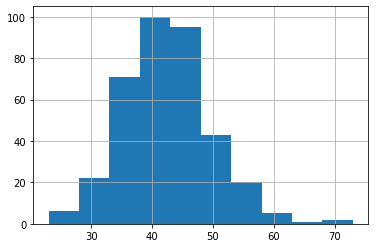

In [3]:
# plot a histogram of a time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.hist()
pyplot.show()

Разделим ряд рождений девочек на 2 части, для которых рассчитаем среднее и дисперсию.

In [4]:
# calculate statistics of partitioned time series data
from pandas import read_csv
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


Видим, что средние и дисперсии двух частей ряда отличаются несущественно.

Проделаем то же самое с рядом пассажиропотока.

In [5]:
# calculate statistics of partitioned time series data
from pandas import read_csv
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


Видим, что средние и дисперсии двух частей ряда сильно различаются.

Посмотрим на гистограмму ряда пассажиропотока.

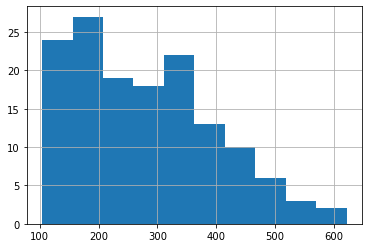

In [6]:
# plot a histogram of a time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.hist()
pyplot.show()

Видим, что распределение отличается от нормального. Сжатое распределение данных может быть еще одним индикатором нестационарного временного ряда. 

Еще раз просматривая график временного ряда, мы видим явную сезонную компоненту и, похоже, что она растет. Это может указывать на
экспоненциальный рост от сезона к сезону. Лог-преобразование можно использовать для того, чтобы ослабить экспоненциальный тренд и вернуться к линейной зависимости. Ниже представлена та же гистограмма с логарифмическим преобразованием временного ряда. 

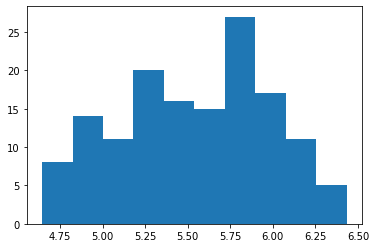

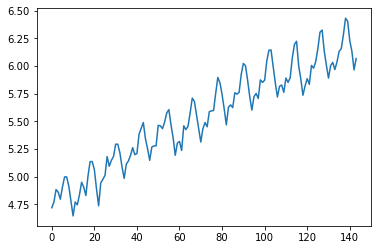

In [7]:
# histogram and line plot of log transformed time series
from pandas import read_csv
from matplotlib import pyplot
from numpy import log
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

Видим, что распределение стало более похожим на нормальное. Тренд стал похож на линейный, с сезонной составляющей.

Посмотрим на средние и дисперсии для двух частей преобразованного ряда.

In [8]:
# calculate statistics of partitioned log transformed time series data
from pandas import read_csv
from numpy import log
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = log(X)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


Мы можем использовать статистический тест, чтобы проверить, является ли разница между двумя выборками гауссовских случайных величин действительной или это статистическая погрешность. Мы могли бы изучить тесты статистической значимости, такие как t-критерий Стьюдента, но мешает последовательная корреляция между значениями. 

Расширенный тест Дики-Фуллера - это тип статистического теста, называемый тестом единичного корня. Он определяет, насколько сильно временной ряд определяется трендом. Он использует авторегрессионную модель. Нулевая гипотеза теста состоит в том, что временной ряд может быть представлен единичным корнем, что он не является стационарным (имеет некоторую зависящую от времени структуру). Альтернативная гипотеза (отвергающая нулевую гипотезу) заключается в том, что временной ряд является стационарным. 

Посмотрим на ряд данных о рождениях девочек.

In [9]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Мы интерпретируем этот результат, используя значение p-критерия из теста. При значении p ниже порога (например, 5% или 1%) мы отвергаем нулевую гипотезу (ряд стационарный), в противном случае мы не можем отвергнуть нулевую гипотезу (ряд нестационарный).  Отказ от нулевой гипотезы означает, что процесс не имеет единичного корня и временной ряд является стационарным или не имеет временной структуры. В нашем случае ряд стационарный.

Посмотрим на ряд данных о пассажиропотоке.

In [10]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Ряд нестационарный.

In [11]:
# calculate stationarity test of log transformed time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
	1%: -3.482
	5%: -2.884
	10%: -2.579


Мы не можем отвергнуть нулевую гипотезу. Ряд нестационарный.